In [44]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [53]:
X_train = X_train/255
X_test = X_test/255

Text(0.5, 1.0, 'Shoes')

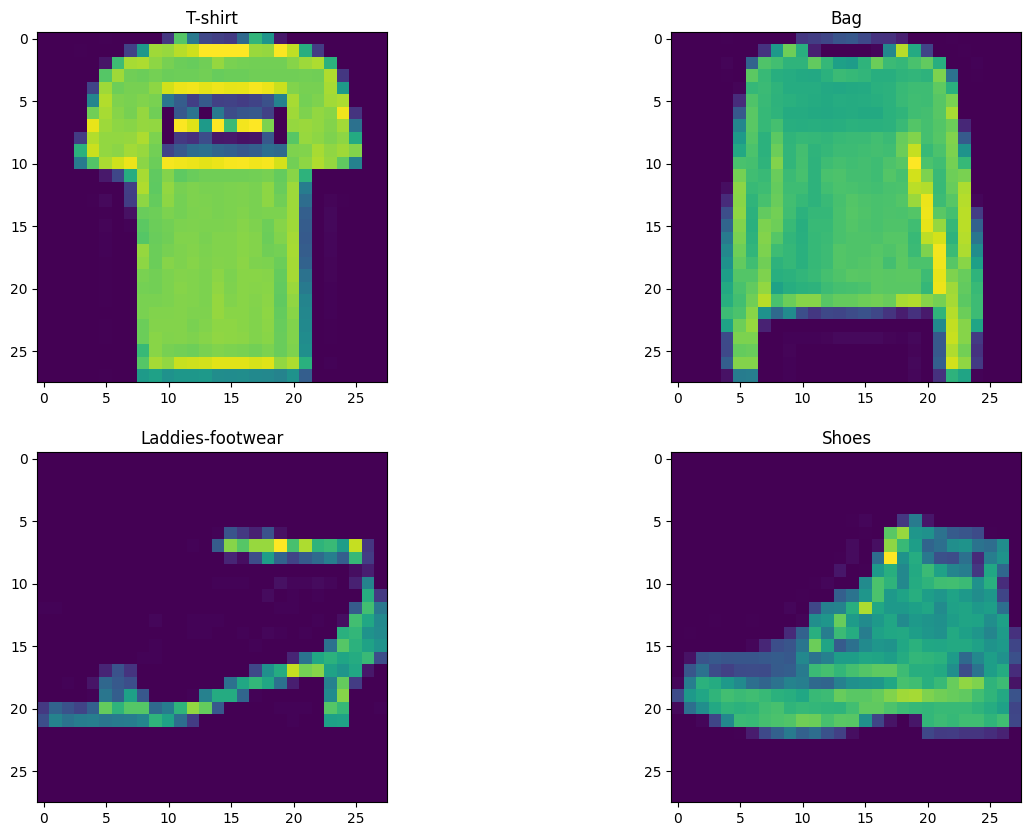

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(X_train[1])
plt.title("T-shirt")
plt.subplot(2,2,2)
plt.imshow(X_train[7483])
plt.title("Bag")
plt.subplot(2,2,3)
plt.imshow(X_train[45323])
plt.title("Laddies-footwear")
plt.subplot(2,2,4)
plt.imshow(X_train[3245])
plt.title("Shoes")

In [55]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), activation='relu', padding='same',   input_shape = (28,28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7472 - loss: 0.7375 - val_accuracy: 0.8725 - val_loss: 0.3392
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8762 - loss: 0.3521 - val_accuracy: 0.8902 - val_loss: 0.2978
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8905 - loss: 0.3031 - val_accuracy: 0.8888 - val_loss: 0.3113
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9033 - loss: 0.2723 - val_accuracy: 0.8935 - val_loss: 0.2885
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9100 - loss: 0.2523 - val_accuracy: 0.8860 - val_loss: 0.3101
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9124 - loss: 0.2345 - val_accuracy: 0.9042 - val_loss: 0.2740
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9186 - loss: 0.2205 - val_accuracy: 0.9080 - val_loss: 0.2544
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9225 - l

In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8989 - loss: 0.2875


0.9003999829292297

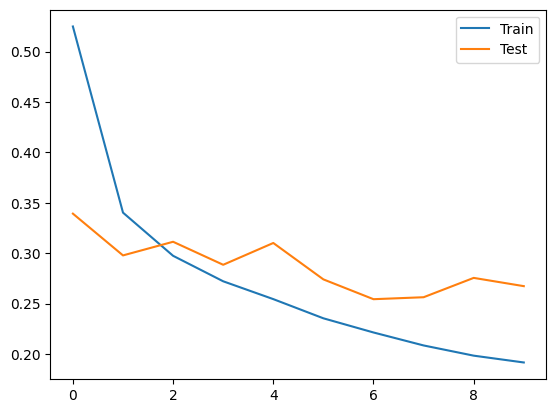

In [59]:
plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'], label = "Test")
plt.legend()

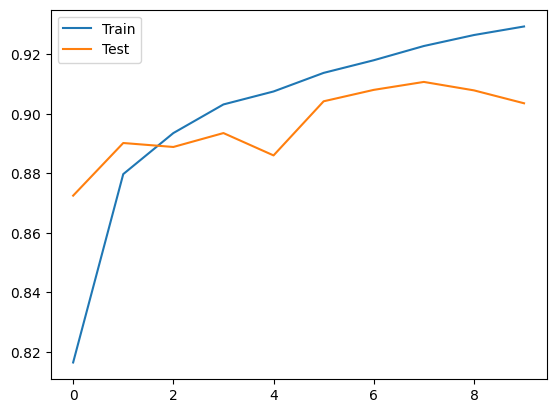

In [60]:
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()